# SVM 

### Project Objective: - Implement SVM classifier on Mushroom dataset and compare SVM performance for different kernels to identify if a mushroom is edible or piosonous.

## Importing libraries

In [1052]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [1054]:
df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


## EDA

In [1056]:
df.shape

(2000, 26)

In [1057]:
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [1058]:
df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [1059]:
df.duplicated().sum()

1024

In [1060]:
# We have almost 50% duplicate records in the dataset. 

In [1061]:
# 1. The Mushroom dataset's features are categorical, and duplicate rows likely represent the same mushroom observation.
# 2. Removing duplicates simplifies the dataset and helps prevent bias in the classification model.

# Let's remove the duplicate records from the dataset.

In [1062]:
df.drop_duplicates(keep='first',inplace=True)

In [1063]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [1064]:
# Resetting the index

In [1065]:
df = df.reset_index(drop=True)

In [1066]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
972,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
973,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
974,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [1067]:
# Checking if all duplicate records are dropped. 
df.duplicated().sum()

0

In [1068]:
# Now, there are no duplicate records or null values in the dataset. 

## Data Visualization

In [1070]:
# Checking unique classes of mushrooms

df['class'].value_counts()

class
poisonous    618
edible       358
Name: count, dtype: int64

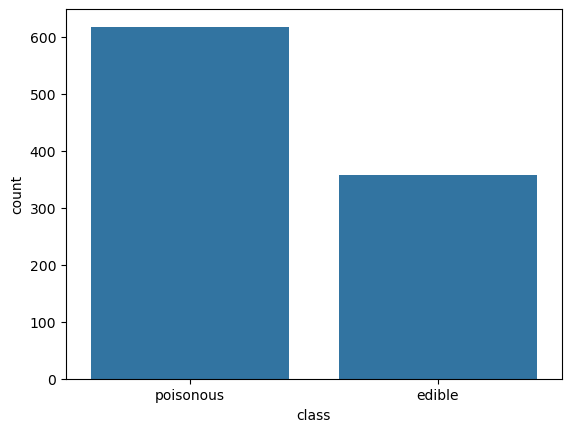

In [1071]:
sns.countplot(x='class', data=df)
plt.show()

In [1133]:
# From above plot, we can see that there are fairly more poisonous mushrooms in the dataset than the edible mushrooms. From this, we can say that
# we have an 'Imbalanced' dataset. 

# Why Imbalance Matters? : - 
# Machine learning models trained on imbalanced datasets tend to be biased towards the majority class. They might achieve high overall accuracy by 
# simply predicting the majority class most of the time, but they might perform poorly on the minority class, which is often the class of interest.

# For model building, we will have to use either 'SMOTE technique' or 'SVC with balanced class weights' or both to address the imbalance in the data.

## Data pre-processing

In [1074]:
# From initial assessment we can clearly tell 'Unnamed: 0' feature which is most likely category ID is insignificant for our predictions.
# Also, 'stalk_height' & 'cap_diameter' features have very little to no significance in deriving the result if the mushroom is edible or poisonous.
# Thus, we will drop these 3 insignificant features. 

df.drop(columns=['Unnamed: 0','stalk_height','cap_diameter'], inplace=True)

In [1075]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,red,yellow,universal,brown,none,large,brown,numerous,paths,edible
972,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,pink,pink,partial,brown,two,pendant,yellow,numerous,grasses,poisonous
973,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,brown,red,universal,orange,two,none,orange,abundant,grasses,edible
974,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous


In [1076]:
# 1. SVM (Support Vector Machines) are inherently designed to work with numerical data.
# 2. If the categorical features have an inherent order (e.g., low, medium, high), label encoding can be suitable as it preserves the 
#    ordinal relationship.
# 3. But our data doesn't have any ordinal relationship, in this case label encoding might introduce an artificial order that could mislead 
#    the SVM model. In such scenarios, one-hot encoding is generally preferred.

In [1077]:
from sklearn.preprocessing import OneHotEncoder

In [1078]:
enc = OneHotEncoder()

In [1079]:
enc_features = df.drop(columns=['class'])

In [1080]:
enc_features.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [1084]:
feature_names = enc.get_feature_names_out(['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat'])

In [1086]:
enc_df = pd.DataFrame(enc.fit_transform(enc_features).toarray(), columns=feature_names)

In [1088]:
enc_df

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
972,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
973,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
974,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1090]:
# Concatenating both DataFrames

In [1092]:
df = pd.concat([df,enc_df], axis=1)
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
972,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
973,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
974,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1094]:
# Removing original features

df.drop(columns=['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat'], inplace=True)

In [1096]:
df

,class,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,edible,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,poisonous,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,poisonous,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,poisonous,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,edible,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
972,poisonous,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
973,edible,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
974,poisonous,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1127]:
# Binary features as in our dataset have a limited range (0 or 1). Applying scaling techniques like standardization might not be beneficial and could 
# potentially distort the inherent meaning of the binary feature. Therefore, although SVM algorithms are sensitive to feature scaling, given our data
# with features containing only binary values (0 & 1), it is not necessary to scale the data. 

In [1098]:
# Now that we have all input features encoded, we can proceed with the Model Building. 

## Model Building

In [1101]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [1103]:
X = df.drop(columns=['class'])
y = df['class']

In [1105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1107]:
# Apply SMOTE to the training data to reduce the effects of imbalance in the dataset.
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [1109]:
# Train an SVM classifier on the resampled data
svc = SVC(class_weight='balanced') # To reduce the effects of imbalance in the dataset.
svc.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced')

In [1111]:
y_pred = svc.predict(X_test)
y_pred

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'edible', 'poisonous', 'poisonous', 'edible',
       'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
    

In [1113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      edible       0.42      0.07      0.12        72
   poisonous       0.64      0.94      0.76       124

    accuracy                           0.62       196
   macro avg       0.53      0.51      0.44       196
weighted avg       0.56      0.62      0.52       196



In [1115]:
# We can see we achieved 0.62 accuracy score for our SVC model. For safety purpose, the model should have high recall and f1-score for 
# poisonous mushrooms with a decent accuracy as in the above classification report. 

In [1117]:
### IMPORTANT CONSIDERATIONS: - 

# 1. Prioritizing Safety: 
#    In the context of mushroom classification, where misclassifying a poisonous mushroom as edible can have serious consequences, prioritizing the 
#    identification of poisonous mushrooms is paramount. This means focusing on maximizing recall for the poisonous class.

# 2. Recall for Poisonous Class: 
#    A high recall for the poisonous class ensures that the model is correctly identifying most, if not all, of the actual poisonous mushrooms in the
#    dataset. This minimizes the risk of a user consuming a poisonous mushroom based on the model's prediction.

# 3. F1-Score for Poisonous Class: 
#    The F1-score provides a balanced measure of precision and recall. Maximizing the F1-score for the poisonous class ensures that the model is not 
#    only identifying most poisonous mushrooms but also doing so with a reasonable level of precision, minimizing false positives.

# 4. Low Recall for Edible Class: 
#    Allowing for a lower recall for the edible class means that the model might miss some edible mushrooms, classifying them as poisonous. While this
#    might lead to discarding some edible mushrooms, it's a less critical error than misclassifying a poisonous mushroom as edible.

# 5. Trade-off: 
#    There is inherently a trade-off between recall for the two classes. Increasing recall for one class often leads to a decrease in recall for the
#    other class. In this case, prioritizing the safety of the user by maximizing recall for the poisonous class is a reasonable approach, even if it
#    means sacrificing some recall for the edible class.

In [1119]:
# Let's try experimenting with different kernel types to see what results we achieve. 

#### 1. Linear kernel

In [948]:
svc = SVC(class_weight='balanced', kernel = 'linear')
svc.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced', kernel='linear')

In [950]:
y_pred = svc.predict(X_test)
y_pred

array(['poisonous', 'poisonous', 'edible', 'edible', 'poisonous',
       'edible', 'poisonous', 'edible', 'edible', 'edible', 'edible',
       'poisonous', 'poisonous', 'edible', 'edible', 'poisonous',
       'edible', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'edible', 'edible', 'edible', 'edible', 'edible',
       'edible', 'poisonous', 'edible', 'edible', 'poisonous',
       'poisonous', 'edible', 'edible', 'poisonous', 'poisonous',
       'edible', 'edible', 'edible', 'edible', 'poisonous', 'edible',
       'edible', 'poisonous', 'poisonous', 'edible', 'edible',
       'poisonous', 'edible', 'edible', 'poisonous', 'edible',
       'poisonous', 'edible', 'poisonous', 'poisonous', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'edible', 'edible', 'edible', 'edible', 'edible', 'poison

In [952]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      edible       0.32      0.42      0.36        72
   poisonous       0.59      0.48      0.53       124

    accuracy                           0.46       196
   macro avg       0.45      0.45      0.45       196
weighted avg       0.49      0.46      0.47       196



In [994]:
# We achieved only 0.46 accuracy and very low recall & f1-score for poisonous class for linear kernel type.   

#### 2. Polynomial

In [970]:
svc = SVC(class_weight='balanced', kernel = 'poly')
svc.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced', kernel='poly')

In [972]:
y_pred = svc.predict(X_test)
y_pred

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'poisonous', 'edible', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'edible', 'edible', 'poisonous', 'edible',
       'edible', 'edible', 'poisonous', 'poisonous', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'poisonous', 'edible',
       'edible', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'edible', 'edible', 'edible', 'edible',
       'edible', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'edible', 'edible', 'poisonous', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'edible'

In [974]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      edible       0.32      0.28      0.30        72
   poisonous       0.61      0.66      0.64       124

    accuracy                           0.52       196
   macro avg       0.47      0.47      0.47       196
weighted avg       0.51      0.52      0.51       196



In [992]:
# We achieved only 0.52 accuracy and low recall & f1-score for poisonous class for polynomial kernel type.

#### 3. Sigmoid

In [984]:
svc = SVC(class_weight='balanced', kernel = 'sigmoid')
svc.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced', kernel='sigmoid')

In [986]:
y_pred = svc.predict(X_test)
y_pred

array(['poisonous', 'poisonous', 'edible', 'edible', 'edible', 'edible',
       'edible', 'poisonous', 'edible', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'edible', 'poisonous',
       'edible', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'poisonous', 'edible', 'edible', 'edible',
       'edible', 'edible', 'edible', 'edible', 'poisonous', 'edible',
       'poisonous', 'edible', 'edible', 'poisonous', 'edible', 'edible',
       'edible', 'poisonous', 'poisonous', 'poisonous', 'edible',
       'edible', 'edible', 'poisonous', 'edible', 'edible', 'poisonous',
       'edible', 'edible', 'edible', 'poisonous', 'edible', 'edible',
       'poisonous', 'edible', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'edible', 'poisonous', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'edible', 'edible', 'edible', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 

In [988]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      edible       0.38      0.54      0.45        72
   poisonous       0.65      0.48      0.55       124

    accuracy                           0.51       196
   macro avg       0.51      0.51      0.50       196
weighted avg       0.55      0.51      0.51       196



In [990]:
# We achieved only 0.51 accuracy and low recall & f1-score for poisonous class for sigmoid kernel type.

In [1121]:
# Let's fine tune the model to see what combinations give us better recall and f1-scores. 

## Model Tuning

In [1123]:
# We will divide model tuning into 2 parts based on presence/absence of gamma values to check which combinations yield better results as gamma values
# have different significances for different types of kernels as explained below: -

# 1. RBF Kernel: gamma is a crucial parameter, significantly affecting the model's flexibility and performance.
# 2. Polynomial and Sigmoid Kernels: gamma is used as a scaling factor but might have a less pronounced impact compared to the RBF kernel.
# 3. Linear Kernel: gamma is not used in the linear kernel.

#### 1. Using gamma values

In [999]:
from sklearn.model_selection import GridSearchCV

In [1001]:
params = {
    'kernel' : ['linear','rbf','poly','sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

In [1003]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1)

In [1005]:
grid.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [1007]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [1135]:
# Applying best parameters found to the model. 

In [1021]:
svc_best_model = SVC(C=1, gamma=0.1, kernel='rbf', class_weight='balanced')
svc_best_model.fit(X_train_resampled, y_train_resampled)
ypr = svc_best_model.predict(X_test)
ypr

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'edible', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisono

In [1023]:
print(classification_report(y_test,ypr))

              precision    recall  f1-score   support

      edible       0.50      0.03      0.05        72
   poisonous       0.64      0.98      0.77       124

    accuracy                           0.63       196
   macro avg       0.57      0.51      0.41       196
weighted avg       0.59      0.63      0.51       196



In [1043]:
# We achieved a high recall value of 0.98 and f1-score of 0.77 for poisonous class & a decent overall accuracy of 0.63 after tuning the model with 
# the best parameters using gamma values. 

#### 2. Without using gamma values

In [1025]:
param_grid = {
    'kernel' : ['linear','rbf','poly','sigmoid'],
    'C': [0.1, 1, 10]
}

In [1027]:
grid = GridSearchCV(SVC(), param_grid=param_grid, verbose=1)

In [1029]:
grid.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [1031]:
grid.best_params_

{'C': 10, 'kernel': 'poly'}

In [1033]:
svc_best_model2 = SVC(C=10, kernel='poly', class_weight='balanced')
svc_best_model2.fit(X_train_resampled, y_train_resampled)
ypre = svc_best_model2.predict(X_test)
ypre

array(['poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'edible', 'poisonous', 'edible', 'edible', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous',
       'poisonous', 'edible', 'poisonous', 'poisonous', 'edible',
       'poisonous', 'edible', 'edible', 'poisonous', 'edible', 'edible',
       'edible', 'poisonous', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'edible', 'poisonous', 'edible', 'edible',
       'poisonous', 'edible', 'poisonous', 'poisonous', 'edible',
       'poisonous', 'edible', 'edible', 'edible', 'edible', 'edible',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'edible', 'edible', 'poisonous', 'edible', 'poisonous',
       'poisonous', 'poisonous', 'poisonous', 'poisonous', 'poisonous',
       'poisonous', 'edible', '

In [1035]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

      edible       0.33      0.29      0.31        72
   poisonous       0.61      0.65      0.63       124

    accuracy                           0.52       196
   macro avg       0.47      0.47      0.47       196
weighted avg       0.51      0.52      0.51       196



In [1045]:
# We achieved only 0.52 accuracy and low recall & f1-score for poisonous class after tuning the model without using gamma values. 

# CONCLUSION: - 

#### 1. 'svc_best_model' with gamma values stood out as the best model for our case with parameters -> C=1, gamma=0.1, kernel='rbf', class_weight='balanced', giving us a high recall value of 0.98 and f1-score of 0.77 for poisonous class & a decent overall accuracy of 0.63. 

#### 2. As mentioned earlier, prioritizing the identification of poisonous mushrooms is paramount. This means focusing on maximizing recall for the poisonous class. The 'svc_best_model' achieved 0.98 recall which is very highly desired for our classification as a high recall for the poisonous class ensures that the model is correctly identifying most, if not all, of the actual poisonous mushrooms in the dataset. This minimizes the risk of a user consuming a poisonous mushroom based on the model's prediction.

# Strengths and weaknesses of Support Vector Machines (SVMs) when applied to the mushroom dataset: - 

### Strengths: 

#### 1. Effective in High-Dimensional Spaces: The mushroom dataset has a large number of features, and SVMs are known to perform well in high dimensional spaces, making them suitable for this dataset.
#### 2. Handles Non-linearity: SVMs can handle non-linear relationships between features using kernel functions like the RBF kernel. This is important for the mushroom dataset, as the relationship between features and edibility might not be strictly linear.
#### 3. Robust to Outliers: SVMs are relatively robust to outliers due to their focus on the margin and support vectors. This can be beneficial for the mushroom dataset, which might contain some noisy or unusual data points.
#### 4. Good Generalization: With proper regularization and parameter tuning, SVMs can achieve good generalization performance, meaning they can accurately classify unseen mushrooms.
#### 5. Versatility: SVMs offer flexibility in choosing different kernel functions and regularization parameters, allowing you to adapt the model to the specific characteristics of the mushroom dataset.

### Weaknesses:

#### 1. Sensitivity to Feature Scaling: SVMs are sensitive to the scale of features. It's crucial to scale the features before applying SVMs to the mushroom dataset to ensure that features with larger values don't dominate the model's training process.
#### 2. Computational Cost: Training SVMs can be computationally expensive, especially for large datasets like Mushroom dataset. 
#### 3. Parameter Tuning: SVMs have several hyperparameters (C, gamma, kernel type) that need to be carefully tuned to achieve optimal performance. This can require some experimentation and computational resources.
#### 4. Interpretability: While SVMs provide insights into feature importance through support vectors, they might not be as easily interpretable as some other models like decision trees.
#### 5. Prone to Overfitting: If not properly regularized, SVMs can be prone to overfitting, especially with complex kernels or high-dimensional data.  Careful parameter tuning and cross-validation are essential to prevent overfitting.